In [1]:
from google.colab import files
uploaded = files.upload()
from google.colab import files
uploaded = files.upload()
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015.csv


Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015.csv


Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_cleaned = df_original.copy()
df_cleaned = df_cleaned[(df_cleaned['BMI'] >= 10) & (df_cleaned['BMI'] <= 60)]
df_cleaned = df_cleaned[(df_cleaned['MentHlth'] <= 30) & (df_cleaned['PhysHlth'] <= 30)]
df_combined = pd.concat([df_original, df_cleaned])
features = ['BMI', 'Age', 'MentHlth', 'PhysHlth']
feature_pairs = [('Age', 'BMI'), ('MentHlth', 'PhysHlth'), ('Age', 'MentHlth'), ('BMI', 'PhysHlth')]

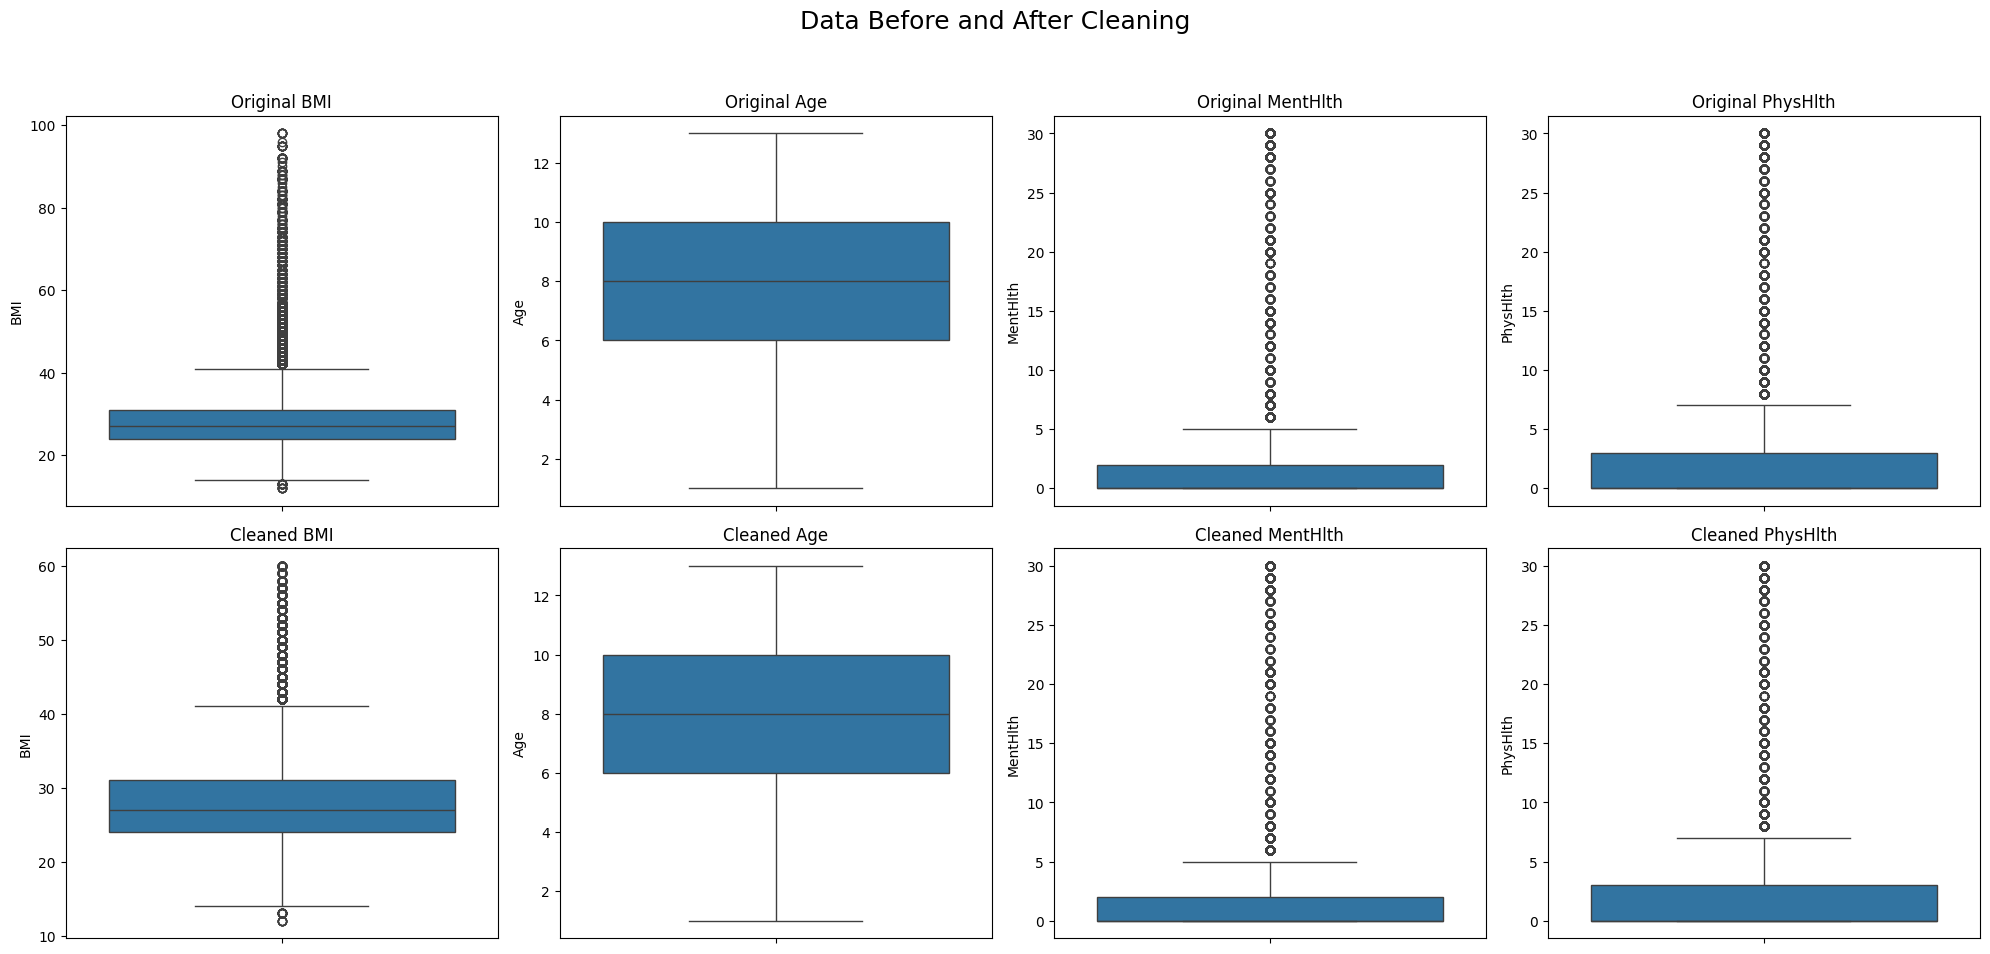

In [12]:
#Boxplot
fig, axes = plt.subplots(2, len(features), figsize=(5 * len(features), 10))
fig.suptitle('Data Before and After Cleaning', fontsize=18)

for i, feature in enumerate(features):
    sns.boxplot(y=df_original[feature], ax=axes[0, i])
    axes[0, i].set_title(f'Original {feature}')

    sns.boxplot(y=df_cleaned[feature], ax=axes[1, i])
    axes[1, i].set_title(f'Cleaned {feature}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


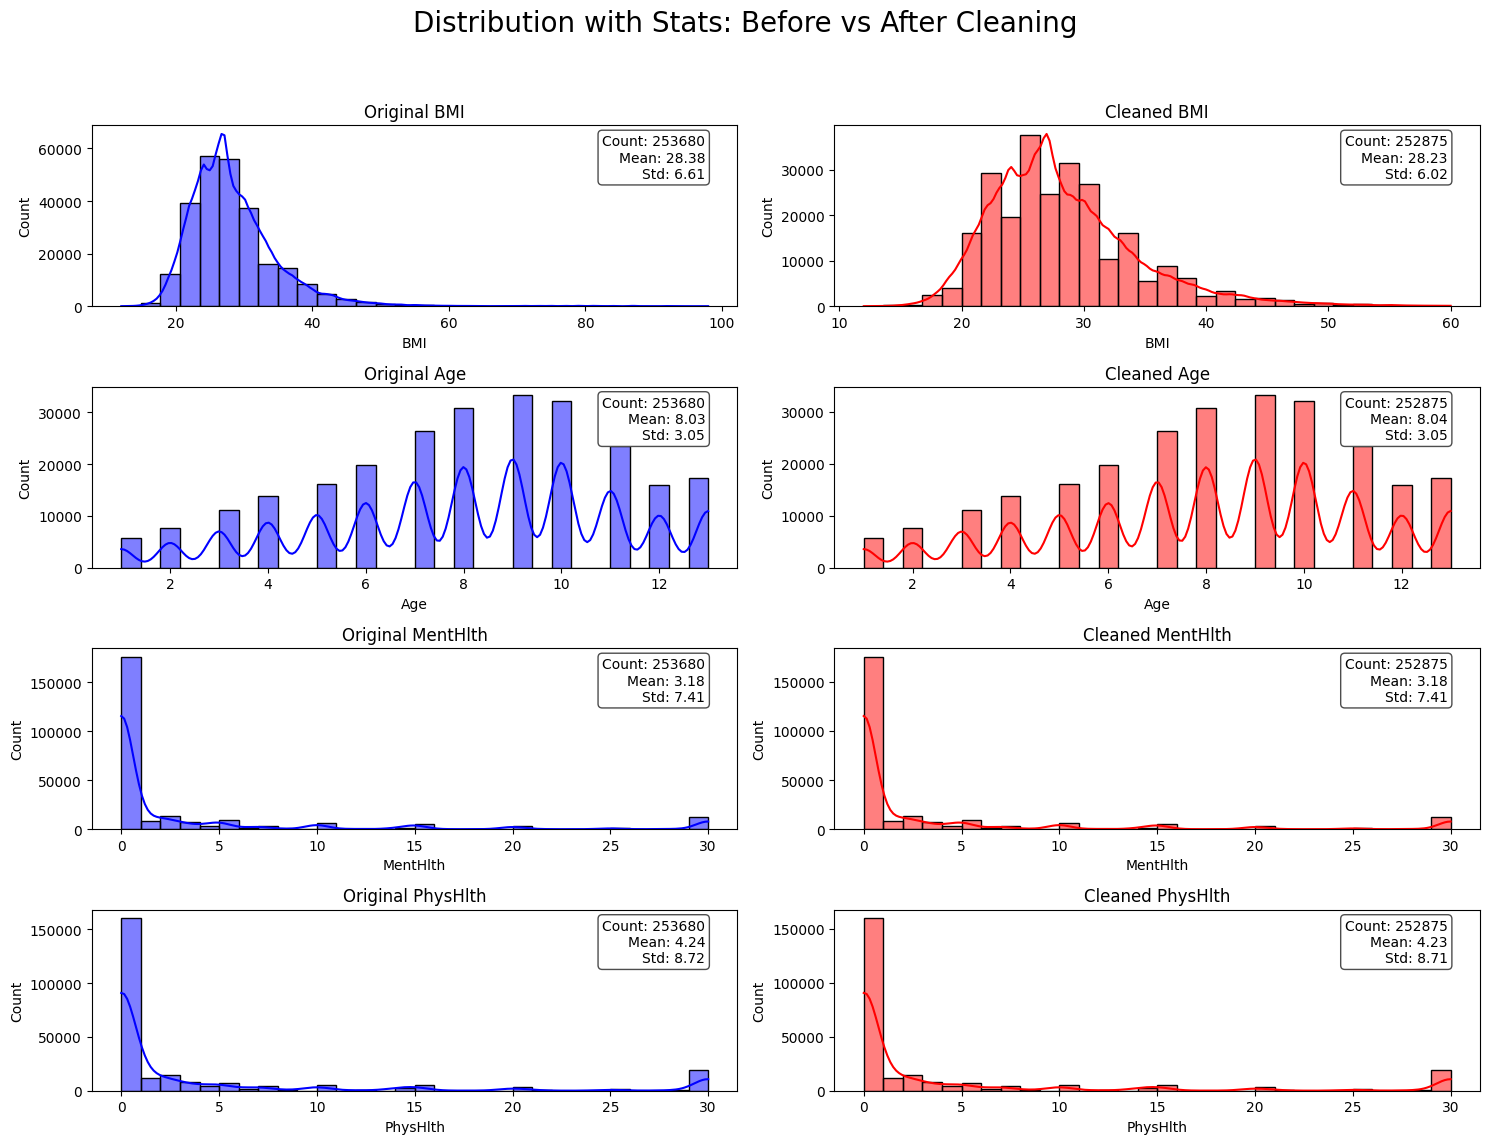

In [16]:
#Histogram
fig, axes = plt.subplots(len(features), 2, figsize=(15, 12))
fig.suptitle('Distribution with Stats: Before vs After Cleaning', fontsize=20)
def annotate_stats(ax, series):
    stats_text = f"Count: {series.count()}\nMean: {series.mean():.2f}\nStd: {series.std():.2f}"
    ax.text(0.95, 0.95, stats_text,
            verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes,
            fontsize=10, bbox=dict(boxstyle="round", fc="w", ec="0.3"))

for i, feature in enumerate(features):
    sns.histplot(df_original[feature], bins=30, kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Original {feature}')
    annotate_stats(axes[i, 0], df_original[feature])

    sns.histplot(df_cleaned[feature], bins=30, kde=True, ax=axes[i, 1], color='red')
    axes[i, 1].set_title(f'Cleaned {feature}')
    annotate_stats(axes[i, 1], df_cleaned[feature])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<ipython-input-22-1d848663d907>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_combined, x='Status', y=feature, ax=axes[i], palette=['red', 'green'])
<ipython-input-22-1d848663d907>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_combined, x='Status', y=feature, ax=axes[i], palette=['red', 'green'])
<ipython-input-22-1d848663d907>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_combined, x='Status', y=feature, ax=axes[i], palette=['red', 'green'])
<ipython-input-22-1d848663d907>:19: FutureWarning: 

Pa

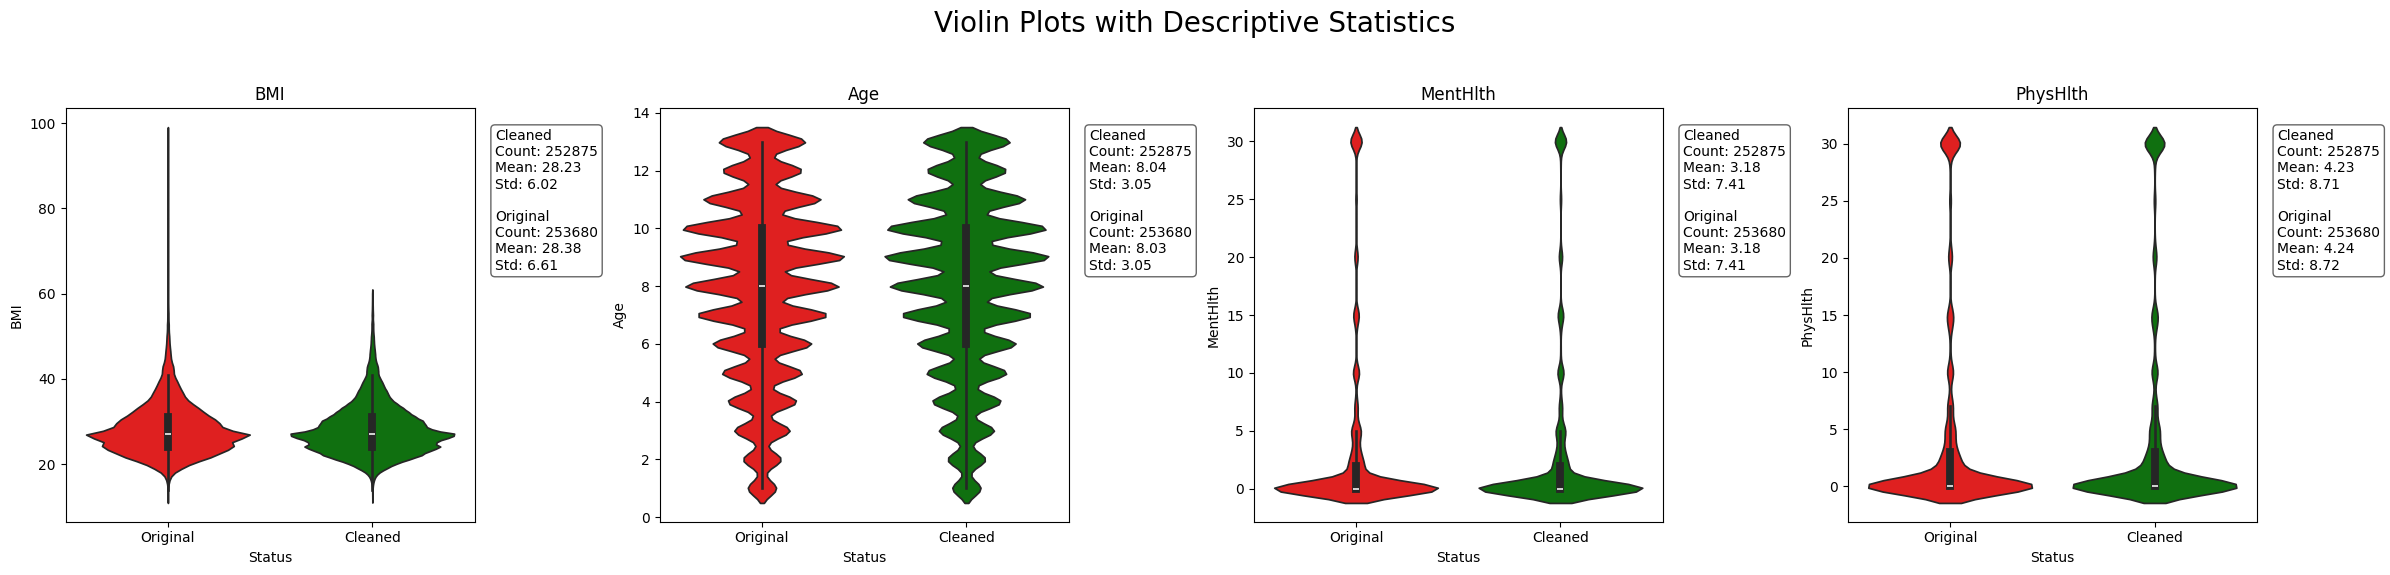

In [22]:
#Distribution
fig, axes = plt.subplots(1, len(features), figsize=(6 * len(features), 6))
fig.suptitle("Violin Plots with Descriptive Statistics", fontsize=20)

def add_stats(ax, data, feature):
    group_stats = data.groupby('Status')[feature].agg(['count', 'mean', 'std'])
    text = ""
    for status in group_stats.index:
        row = group_stats.loc[status]
        text += f"{status}\nCount: {int(row['count'])}\nMean: {row['mean']:.2f}\nStd: {row['std']:.2f}\n\n"
    ax.text(1.05, 0.95, text.strip(), transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='left',
            fontsize=10, bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))

for i, feature in enumerate(features):
    sns.violinplot(data=df_combined, x='Status', y=feature, ax=axes[i], palette=['red', 'green'])
    axes[i].set_title(feature)
    add_stats(axes[i], df_combined, feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

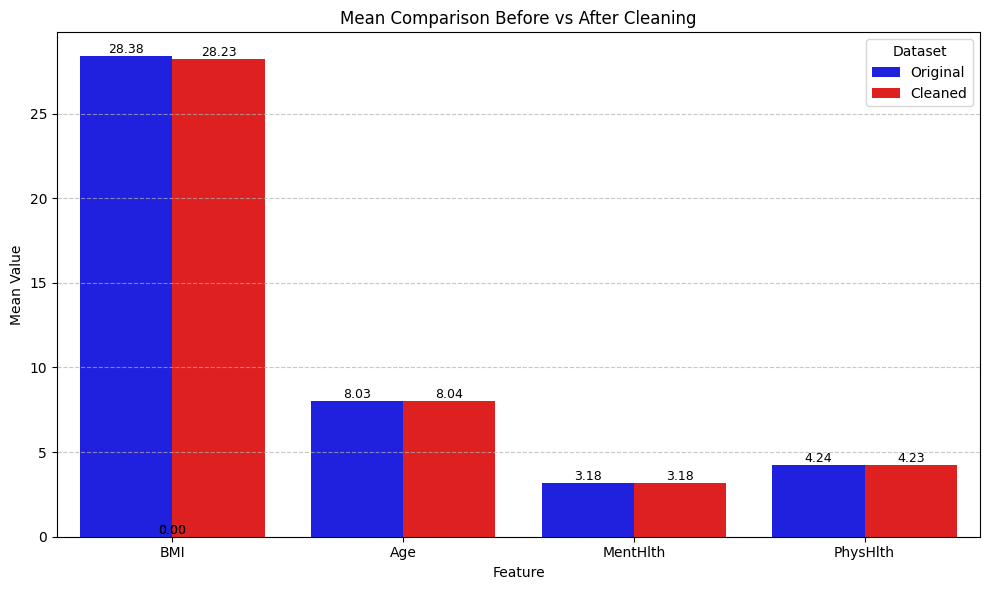

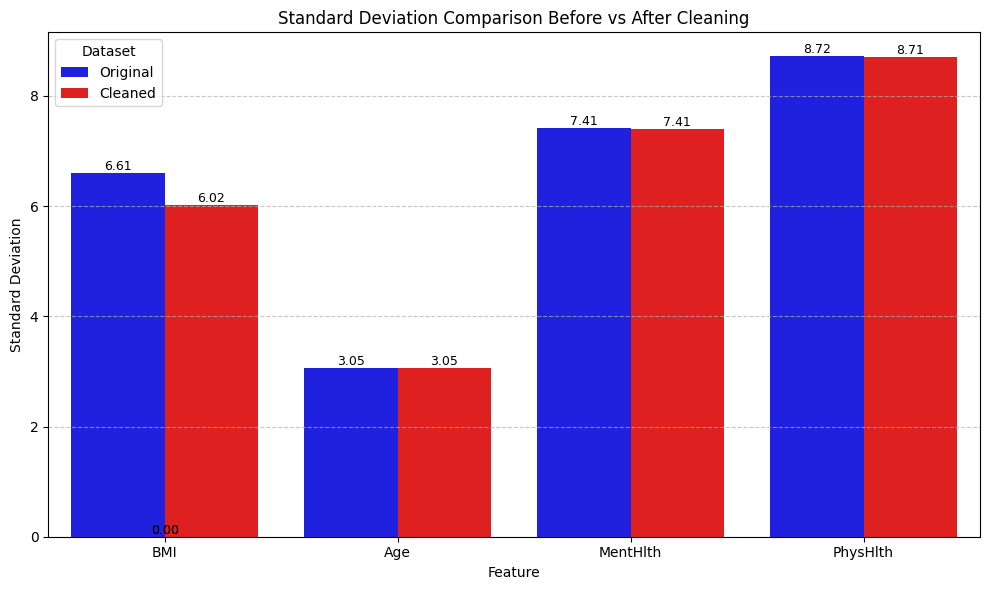

In [26]:
#BarPlots
stats_data = {
    'Feature': [],
    'Dataset': [],
    'Mean': [],
    'Std': [],
    'Count': []}

for feature in features:
    stats_data['Feature'].append(feature)
    stats_data['Dataset'].append('Original')
    stats_data['Mean'].append(df_original[feature].mean())
    stats_data['Std'].append(df_original[feature].std())
    stats_data['Count'].append(df_original[feature].count())

    stats_data['Feature'].append(feature)
    stats_data['Dataset'].append('Cleaned')
    stats_data['Mean'].append(df_cleaned[feature].mean())
    stats_data['Std'].append(df_cleaned[feature].std())
    stats_data['Count'].append(df_cleaned[feature].count())

df_stats = pd.DataFrame(stats_data)

def plot_bar_with_labels(df, stat_col, title, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x='Feature', y=stat_col, hue='Dataset', palette=['Blue', 'Red'])

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
plot_bar_with_labels(df_stats, 'Mean', 'Mean Comparison Before vs After Cleaning', 'Mean Value')
plot_bar_with_labels(df_stats, 'Std', 'Standard Deviation Comparison Before vs After Cleaning', 'Standard Deviation')


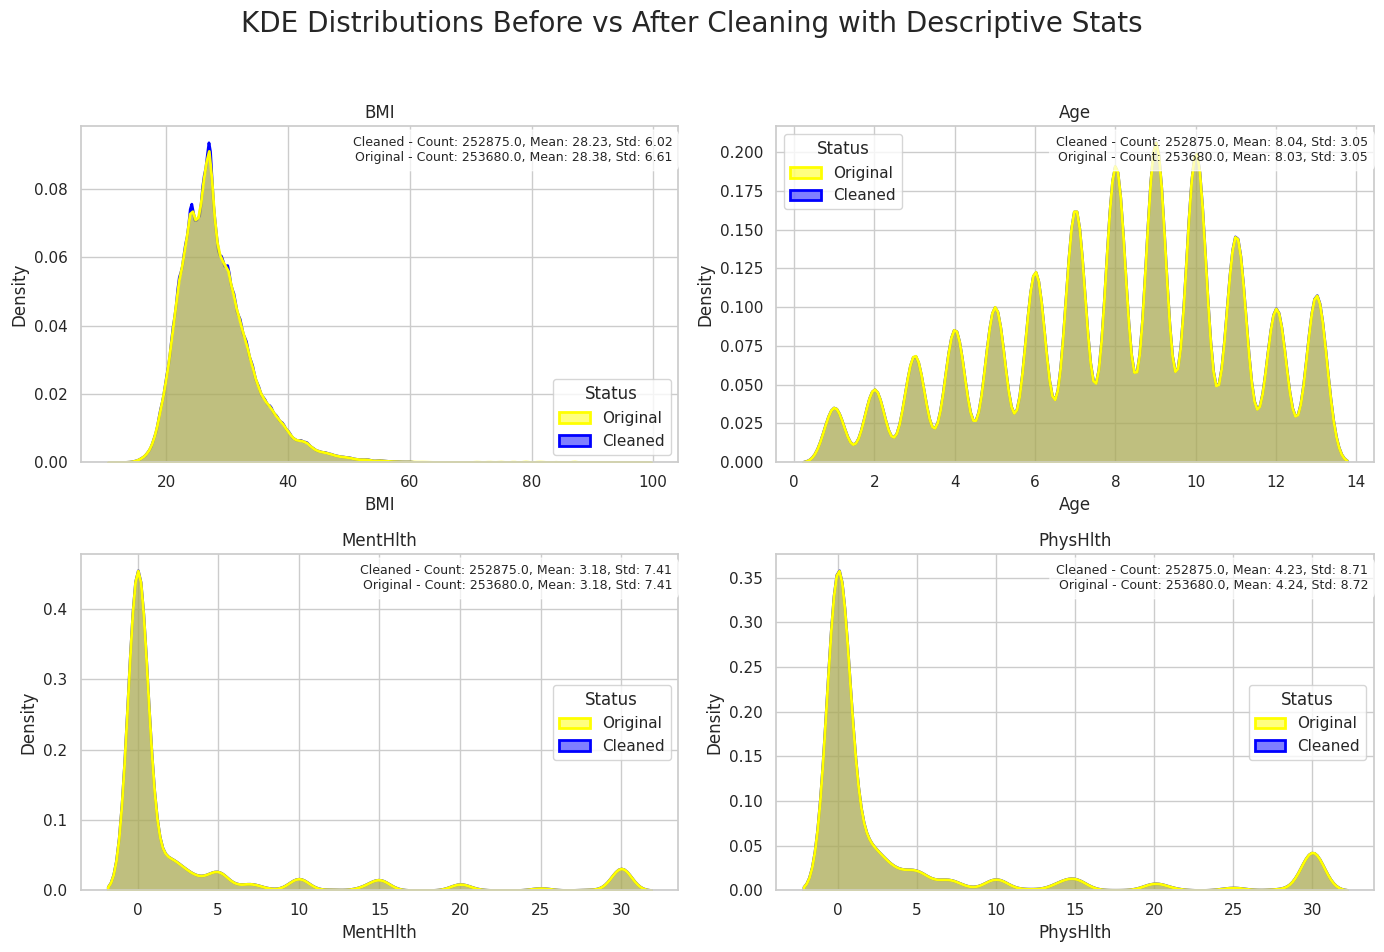

In [30]:
#KDE
sns.set(style='whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
fig.suptitle('KDE Distributions Before vs After Cleaning with Descriptive Stats', fontsize=20)

for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(data=df_combined, x=feature, hue='Status', fill=True, common_norm=False,
                palette=['yellow', 'blue'], alpha=0.5, linewidth=2, ax=ax)
    ax.set_title(feature)
    ax.grid(True)
    stats = df_combined.groupby('Status')[feature].agg(['count', 'mean', 'std']).round(2)
    stats_text = "\n".join(
        [f"{status} - Count: {row['count']}, Mean: {row['mean']}, Std: {row['std']}"
         for status, row in stats.iterrows()])
    ax.text(0.99, 0.97, stats_text, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='right',
            fontsize=9, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<ipython-input-33-66e0bfc63492>:18: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=df_combined, x=x, y=y, hue='Status', alpha=0.5, palette=['orange', 'blue'], ax=axes[i])
<ipython-input-33-66e0bfc63492>:18: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=df_combined, x=x, y=y, hue='Status', alpha=0.5, palette=['orange', 'blue'], ax=axes[i])
<ipython-input-33-66e0bfc63492>:18: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=df_combined, x=x, y=y, hue='Status', alpha=0.5, palette=['orange', 'blue'], ax=axes[i])
<ipython-input-33-66e0bfc63492>:18: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=df_combined, x=x, y=y, hue='Status', alpha=0.5, palette=['orange', 'blue'], ax=axes[i])
<ipython-input-33-66e0bfc63492>:22: 

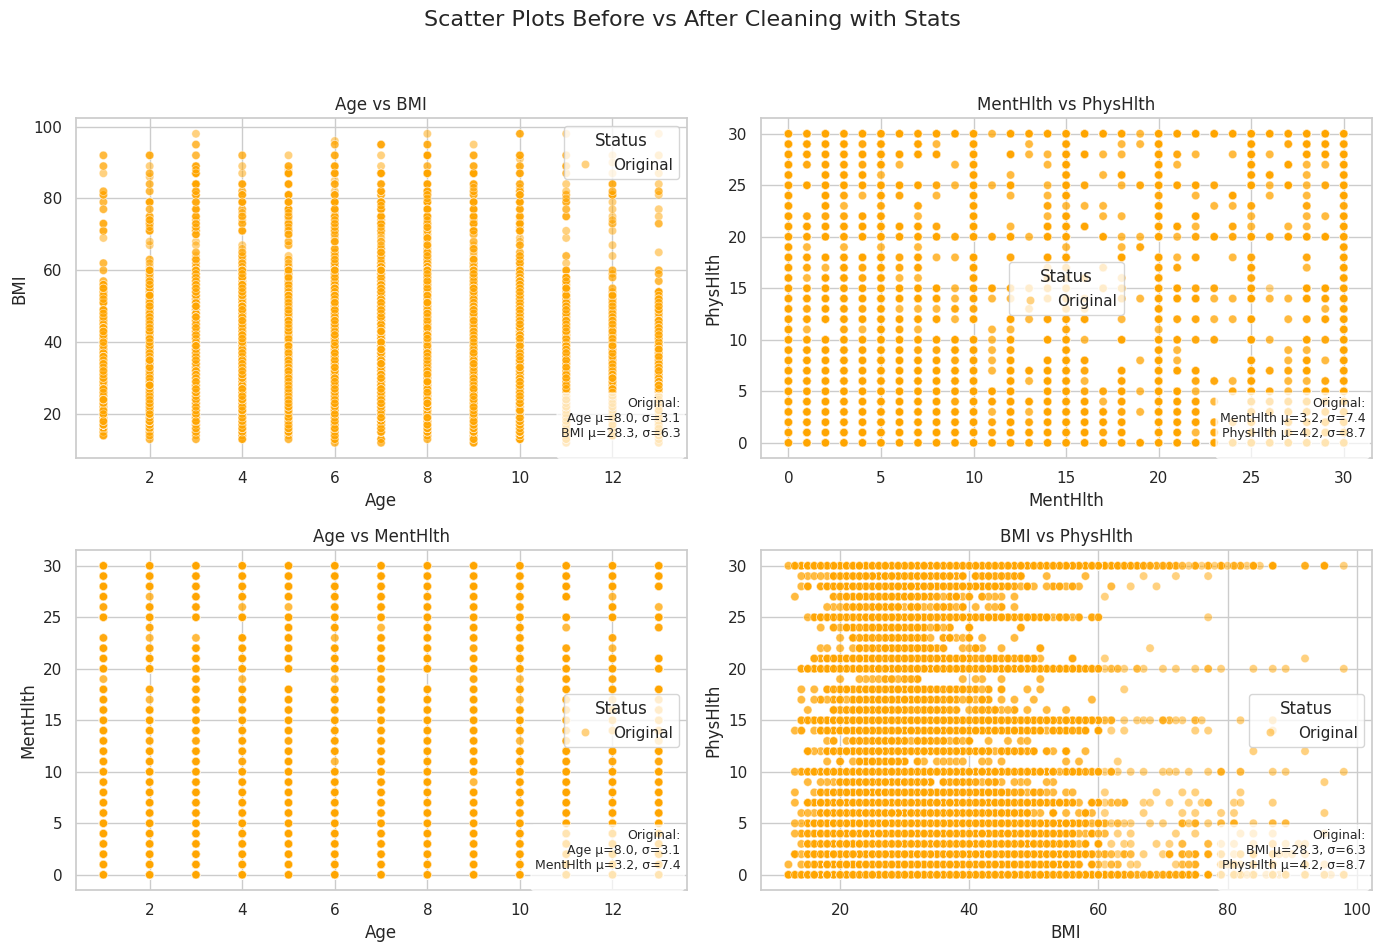

In [33]:
#Scatter Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
fig.suptitle('Scatter Plots Before vs After Cleaning with Stats', fontsize=16)

def annotate_scatter(ax, df, x, y):
    grouped = df.groupby('Status')[[x, y]].agg(['mean', 'std', 'count']).round(1)
    lines = []
    for status in grouped.index:
        stats = grouped.loc[status]
        lines.append(f"{status}:\n{ x } μ={stats[x]['mean']}, σ={stats[x]['std']}\n{ y } μ={stats[y]['mean']}, σ={stats[y]['std']}\n")
    full_text = "\n".join(lines)
    ax.text(0.99, 0.01, full_text, transform=ax.transAxes,
            ha='right', va='bottom', fontsize=9,
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

for i, (x, y) in enumerate(feature_pairs):
    sns.scatterplot(data=df_combined, x=x, y=y, hue='Status', alpha=0.5, palette=['orange', 'blue'], ax=axes[i])
    axes[i].set_title(f"{x} vs {y}")
    annotate_scatter(axes[i], df_combined, x, y)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

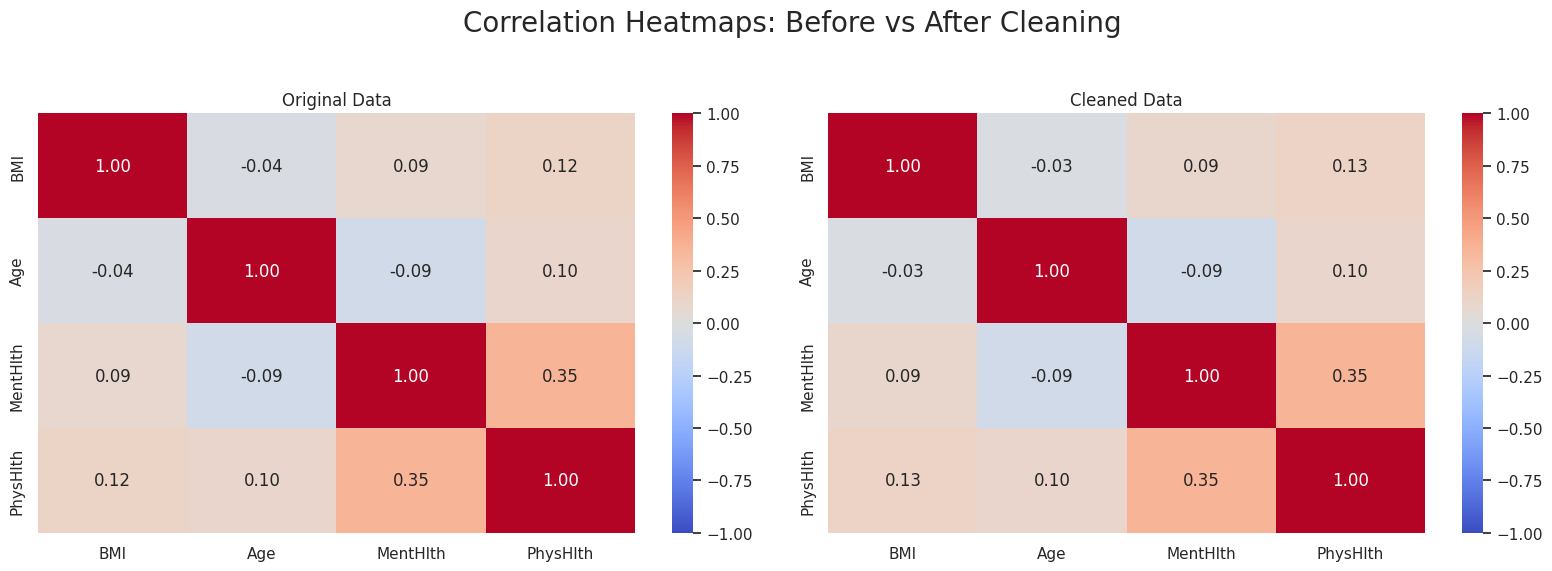

In [34]:
#Heatmaps
corr_original = df_original[features].corr()
corr_cleaned = df_cleaned[features].corr()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Correlation Heatmaps: Before vs After Cleaning', fontsize=20)

sns.heatmap(corr_original, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Original Data")
sns.heatmap(corr_cleaned, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Cleaned Data")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<ipython-input-35-9e2fb5d023bb>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist_data = df_combined.groupby(['Status', binned]).size().reset_index(name='Count')
<ipython-input-35-9e2fb5d023bb>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist_data = df_combined.groupby(['Status', binned]).size().reset_index(name='Count')


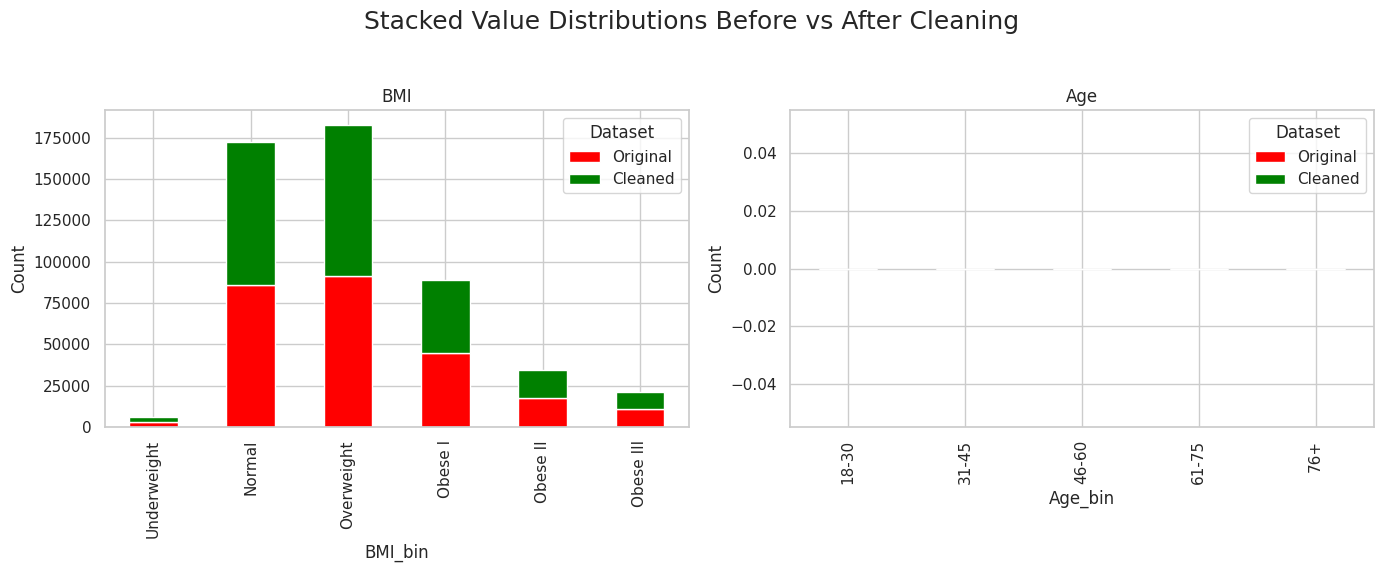

In [35]:
#Bar chart
df_original['Status'] = 'Original'
df_cleaned['Status'] = 'Cleaned'
df_combined = pd.concat([df_original, df_cleaned])
df_combined['BMI_bin'] = pd.cut(df_combined['BMI'], bins=[0, 18.5, 25, 30, 35, 40, 60],
                                 labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])
df_combined['Age_bin'] = pd.cut(df_combined['Age'], bins=[17, 30, 45, 60, 75, 100],
                                 labels=['18-30', '31-45', '46-60', '61-75', '76+'])

binned_features = ['BMI_bin', 'Age_bin']
fig, axes = plt.subplots(1, len(binned_features), figsize=(14, 6))
fig.suptitle('Stacked Value Distributions Before vs After Cleaning', fontsize=18)

for i, binned in enumerate(binned_features):
    dist_data = df_combined.groupby(['Status', binned]).size().reset_index(name='Count')
    pivot_data = dist_data.pivot(index=binned, columns='Status', values='Count').fillna(0)
    pivot_data[['Original', 'Cleaned']].plot(kind='bar', stacked=True, ax=axes[i], color=['red', 'green'])
    axes[i].set_title(binned.replace("_bin", ""))
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Dataset")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


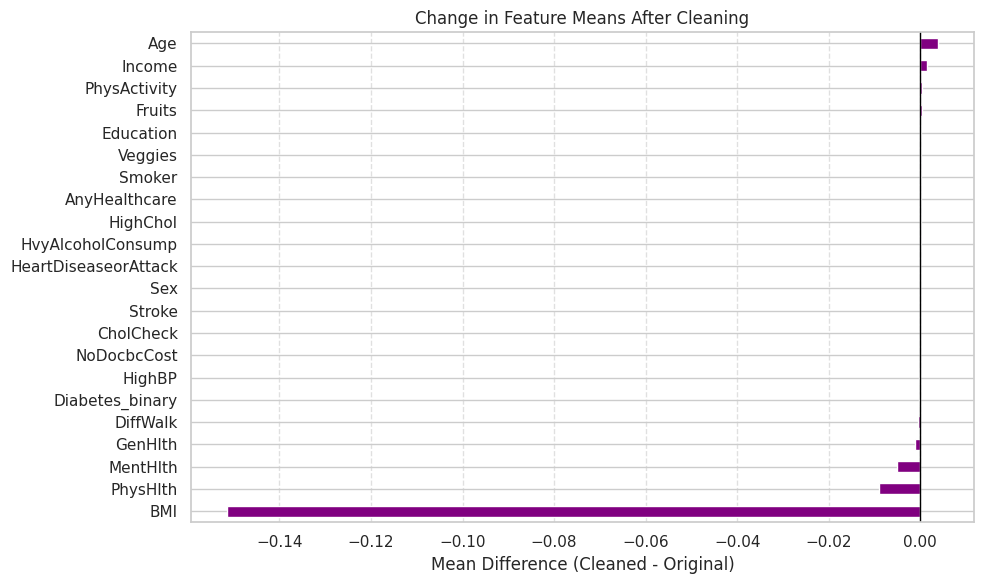

In [38]:
#difference
numeric_cols = df_original.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col != 'Status']  # just in case

mean_original = df_original[numeric_cols].mean()
mean_cleaned = df_cleaned[numeric_cols].mean()
mean_diff = mean_cleaned - mean_original

plt.figure(figsize=(10, 6))
mean_diff.sort_values().plot(kind='barh', color='purple')
plt.axvline(0, color='black', linewidth=1)
plt.title('Change in Feature Means After Cleaning')
plt.xlabel('Mean Difference (Cleaned - Original)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


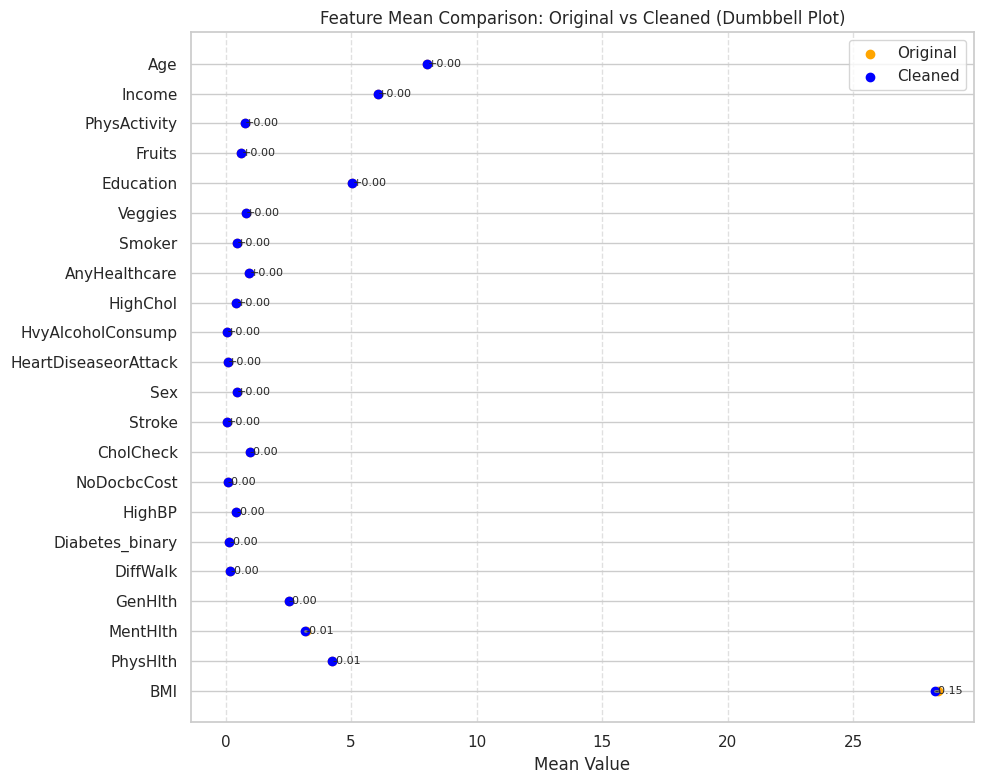

In [41]:
#dumbbell
numeric_cols = df_original.select_dtypes(include='number').columns
mean_orig = df_original[numeric_cols].mean()
mean_clean = df_cleaned[numeric_cols].mean()
df_means = pd.DataFrame({
    'Feature': numeric_cols,
    'Original': mean_orig.values,
    'Cleaned': mean_clean.values})
df_means['Diff'] = df_means['Cleaned'] - df_means['Original']
df_means = df_means.sort_values('Diff')

plt.figure(figsize=(10, 8))
for i, row in df_means.iterrows():
    plt.plot([row['Original'], row['Cleaned']], [row['Feature'], row['Feature']], color='gray', linewidth=2)
    plt.scatter(row['Original'], row['Feature'], color='orange', label='Original' if i == 0 else "")
    plt.scatter(row['Cleaned'], row['Feature'], color='blue', label='Cleaned' if i == 0 else "")
    plt.text(row['Cleaned'] + 0.01, row['Feature'], f"{row['Diff']:+.2f}", va='center', fontsize=8)

plt.title('Feature Mean Comparison: Original vs Cleaned (Dumbbell Plot)')
plt.xlabel('Mean Value')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

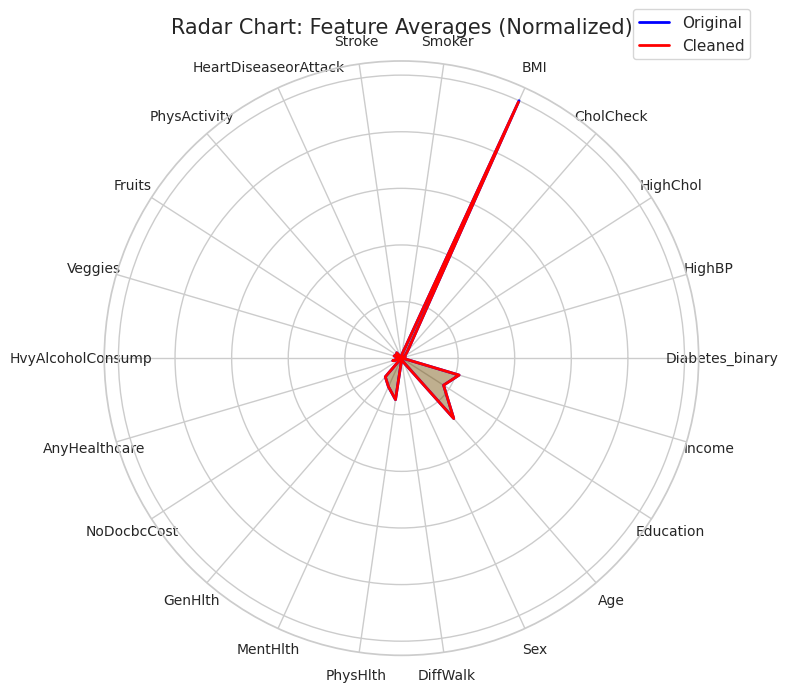

In [44]:
#radar
numeric_cols = df_original.select_dtypes(include='number').columns.tolist()
means_orig = df_original[numeric_cols].mean()
means_clean = df_cleaned[numeric_cols].mean()
means_orig_scaled = (means_orig - means_orig.min()) / (means_orig.max() - means_orig.min())
means_clean_scaled = (means_clean - means_orig.min()) / (means_orig.max() - means_orig.min())

labels = numeric_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values_orig = means_orig_scaled.tolist()
values_clean = means_clean_scaled.tolist()
values_orig += values_orig[:1]
values_clean += values_clean[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values_orig, label='Original', color='blue', linewidth=2)
ax.fill(angles, values_orig, color='red', alpha=0.25)
ax.plot(angles, values_clean, label='Cleaned', color='red', linewidth=2)
ax.fill(angles, values_clean, color='green', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels([])
ax.set_title("Radar Chart: Feature Averages (Normalized)", fontsize=15, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()

<ipython-input-47-c8680bb23b03>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_combined, x='Status', y=feature, jitter=True, alpha=0.4, ax=ax, palette=['blue', 'orange'])
<ipython-input-47-c8680bb23b03>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_combined, x='Status', y=feature, jitter=True, alpha=0.4, ax=ax, palette=['blue', 'orange'])
<ipython-input-47-c8680bb23b03>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_combined, x='Status', y=feature, jitter=True, alpha=0.4, ax=ax, palette=['blue', 'orange']

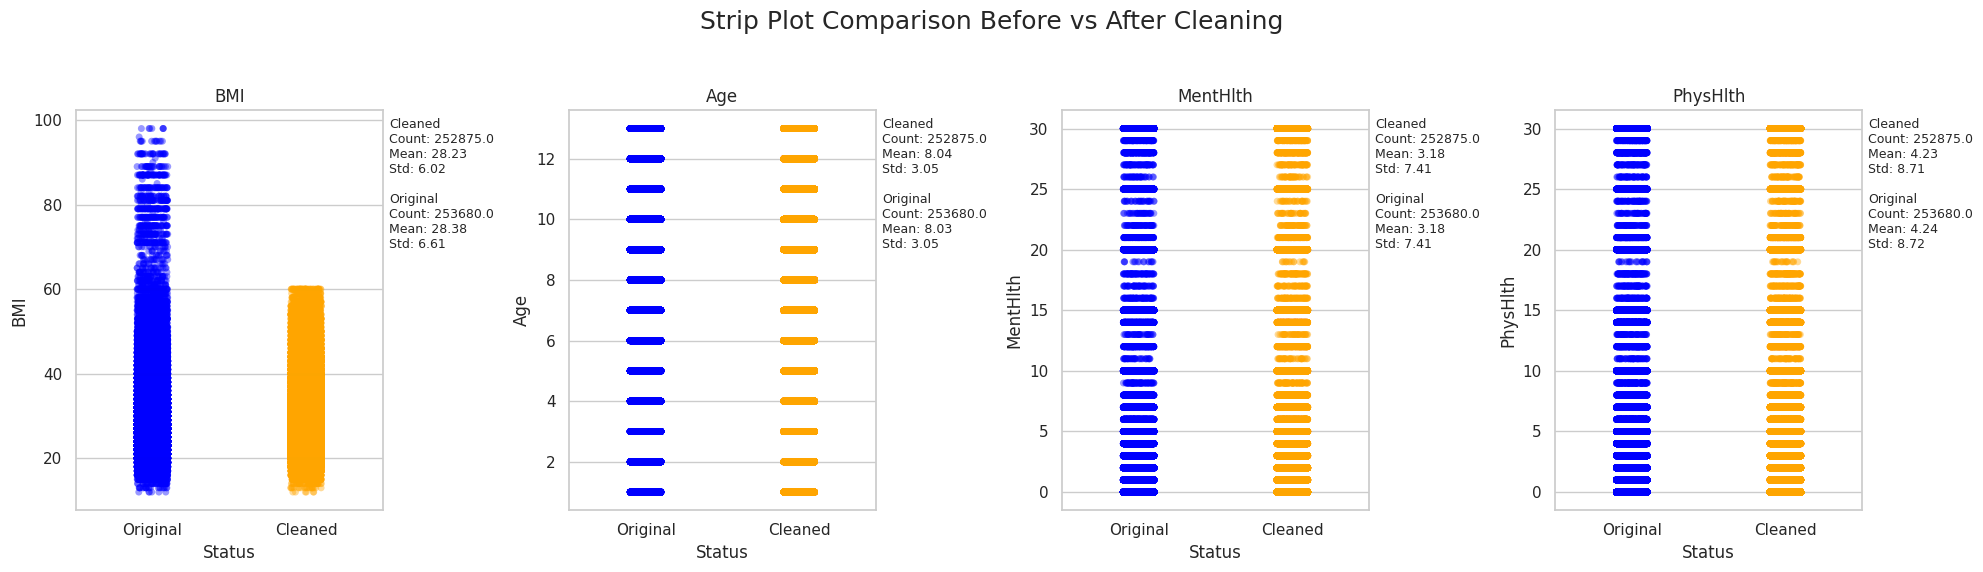

In [47]:
#strip plot
fig, axes = plt.subplots(1, len(features), figsize=(5 * len(features), 6), sharey=False)
fig.suptitle('Strip Plot Comparison Before vs After Cleaning', fontsize=18)

for i, feature in enumerate(features):
    ax = axes[i]
    sns.stripplot(data=df_combined, x='Status', y=feature, jitter=True, alpha=0.4, ax=ax, palette=['blue', 'orange'])
    ax.set_title(feature)
    stats = df_combined.groupby('Status')[feature].agg(['count', 'mean', 'std']).round(2)
    text = ""
    for label in stats.index:
        row = stats.loc[label]
        text += f"{label}\nCount: {row['count']}\nMean: {row['mean']}\nStd: {row['std']}\n\n"
    ax.text(1.02, 0.98, text.strip(), transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='left',
            fontsize=9, bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()